# Aim: Classify cats and dogs using Convolutional neural networks

In [15]:
import tensorflow as tf
import tensorflow_hub as hub
import os
from keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers


In [16]:
train_dir=r'C:\Users\adity\Downloads\dataset\dataset\training_set'
Labels = ['cat', 'dog']
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

training_set = train_datagen.flow_from_directory(
    train_dir,
    target_size = (64, 64),
    batch_size = 32,
    class_mode = "binary"
)

Found 8000 images belonging to 2 classes.


In [17]:
test_dir=r'C:\Users\adity\Downloads\dataset\dataset\test_set'
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size = (64, 64),
    batch_size = 32,
    class_mode = "binary"
)

Found 2000 images belonging to 2 classes.


In [18]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = "relu", input_shape = (64, 64, 3)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = "relu"))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units = 128, activation = "relu"))
cnn.add(tf.keras.layers.Dense(units = 1, activation = "sigmoid"))
cnn.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_8 (Flatten)         (None, 6272)              0         
                                                                 
 dense_14 (Dense)            (None, 128)             

In [19]:
cnn.compile(
    optimizer = "adam", 
    loss = "binary_crossentropy", 
    metrics = [
               "accuracy",
               tf.keras.metrics.Precision(name = "precision"),
               tf.keras.metrics.Recall(name = "recall")
            ]
)
history = cnn.fit(
    x = training_set,
    validation_data = test_set,
    epochs = 40
)

Epoch 1/40
250/250 [==============================] - 44s 170ms/step - loss: 0.6753 - accuracy: 0.5760 - precision: 0.5717 - recall: 0.6058 - val_loss: 0.6376 - val_accuracy: 0.6410 - val_precision: 0.6123 - val_recall: 0.7690
Epoch 2/40
250/250 [==============================] - 44s 177ms/step - loss: 0.6178 - accuracy: 0.6620 - precision: 0.6577 - recall: 0.6758 - val_loss: 0.5929 - val_accuracy: 0.6915 - val_precision: 0.7022 - val_recall: 0.6650
Epoch 3/40
250/250 [==============================] - 45s 182ms/step - loss: 0.5735 - accuracy: 0.7019 - precision: 0.7056 - recall: 0.6927 - val_loss: 0.5439 - val_accuracy: 0.7345 - val_precision: 0.7214 - val_recall: 0.7640
Epoch 4/40
250/250 [==============================] - 43s 174ms/step - loss: 0.5389 - accuracy: 0.7270 - precision: 0.7288 - recall: 0.7230 - val_loss: 0.5140 - val_accuracy: 0.7585 - val_precision: 0.7934 - val_recall: 0.6990
Epoch 5/40
250/250 [==============================] - 48s 192ms/step - loss: 0.5073 - accura

Epoch 37/40
250/250 [==============================] - 45s 182ms/step - loss: 0.1184 - accuracy: 0.9557 - precision: 0.9576 - recall: 0.9538 - val_loss: 0.7380 - val_accuracy: 0.8000 - val_precision: 0.8112 - val_recall: 0.7820
Epoch 38/40
250/250 [==============================] - 44s 174ms/step - loss: 0.1243 - accuracy: 0.9528 - precision: 0.9528 - recall: 0.9528 - val_loss: 0.7858 - val_accuracy: 0.7915 - val_precision: 0.7984 - val_recall: 0.7800
Epoch 39/40
250/250 [==============================] - 44s 175ms/step - loss: 0.1118 - accuracy: 0.9557 - precision: 0.9567 - recall: 0.9548 - val_loss: 0.7834 - val_accuracy: 0.7935 - val_precision: 0.7830 - val_recall: 0.8120
Epoch 40/40
250/250 [==============================] - 44s 175ms/step - loss: 0.1006 - accuracy: 0.9611 - precision: 0.9626 - recall: 0.9595 - val_loss: 0.9056 - val_accuracy: 0.7905 - val_precision: 0.7873 - val_recall: 0.7960


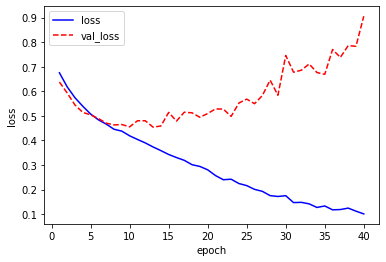

In [20]:
import matplotlib.pyplot as plt
epochs = range(1, 41)

# Loss
plt.figure()
plt.plot(epochs, history.history["loss"], 'b', label = "loss")
plt.plot(epochs, history.history["val_loss"], 'r--', label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()